# Úkol č. 4

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data

## Rozhodovací strom

Náhled dat:

In [20]:
data = pd.read_csv(fr"_data\ukol_04_data.csv")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Vylistování názvů sloupců (ať se neupíšeme):

In [21]:
list(data.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

Rozdělení vstupních proměnných na kategoriální a číselné:

In [22]:
categorical_columns = [
                    'job',
                    'marital',
                    'education',
                    'default',
                    'housing',
                    'loan',
                    'contact',
                    'poutcome'
                        ]

numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

y = data["y"]

Konverze kategorických proměnných na číselné:

In [53]:
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
# proč se zdá být funkce "toarray" nenalezená? (viz buňka níže)
encoded_columns = encoded_columns.toarray()

others = data[numerical_columns].to_numpy()

X = np.concatenate([encoded_columns, others], axis= 1)


In [54]:
# chybová hláška: 'numpy.ndarray' object has no attribute 'toarray'
#pd.DataFrame(X.toarray(), columns=encoder.get_feature_names_out()).head()

In [55]:
encoder.get_feature_names_out()

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype=object)

In [57]:
type(X)

numpy.ndarray

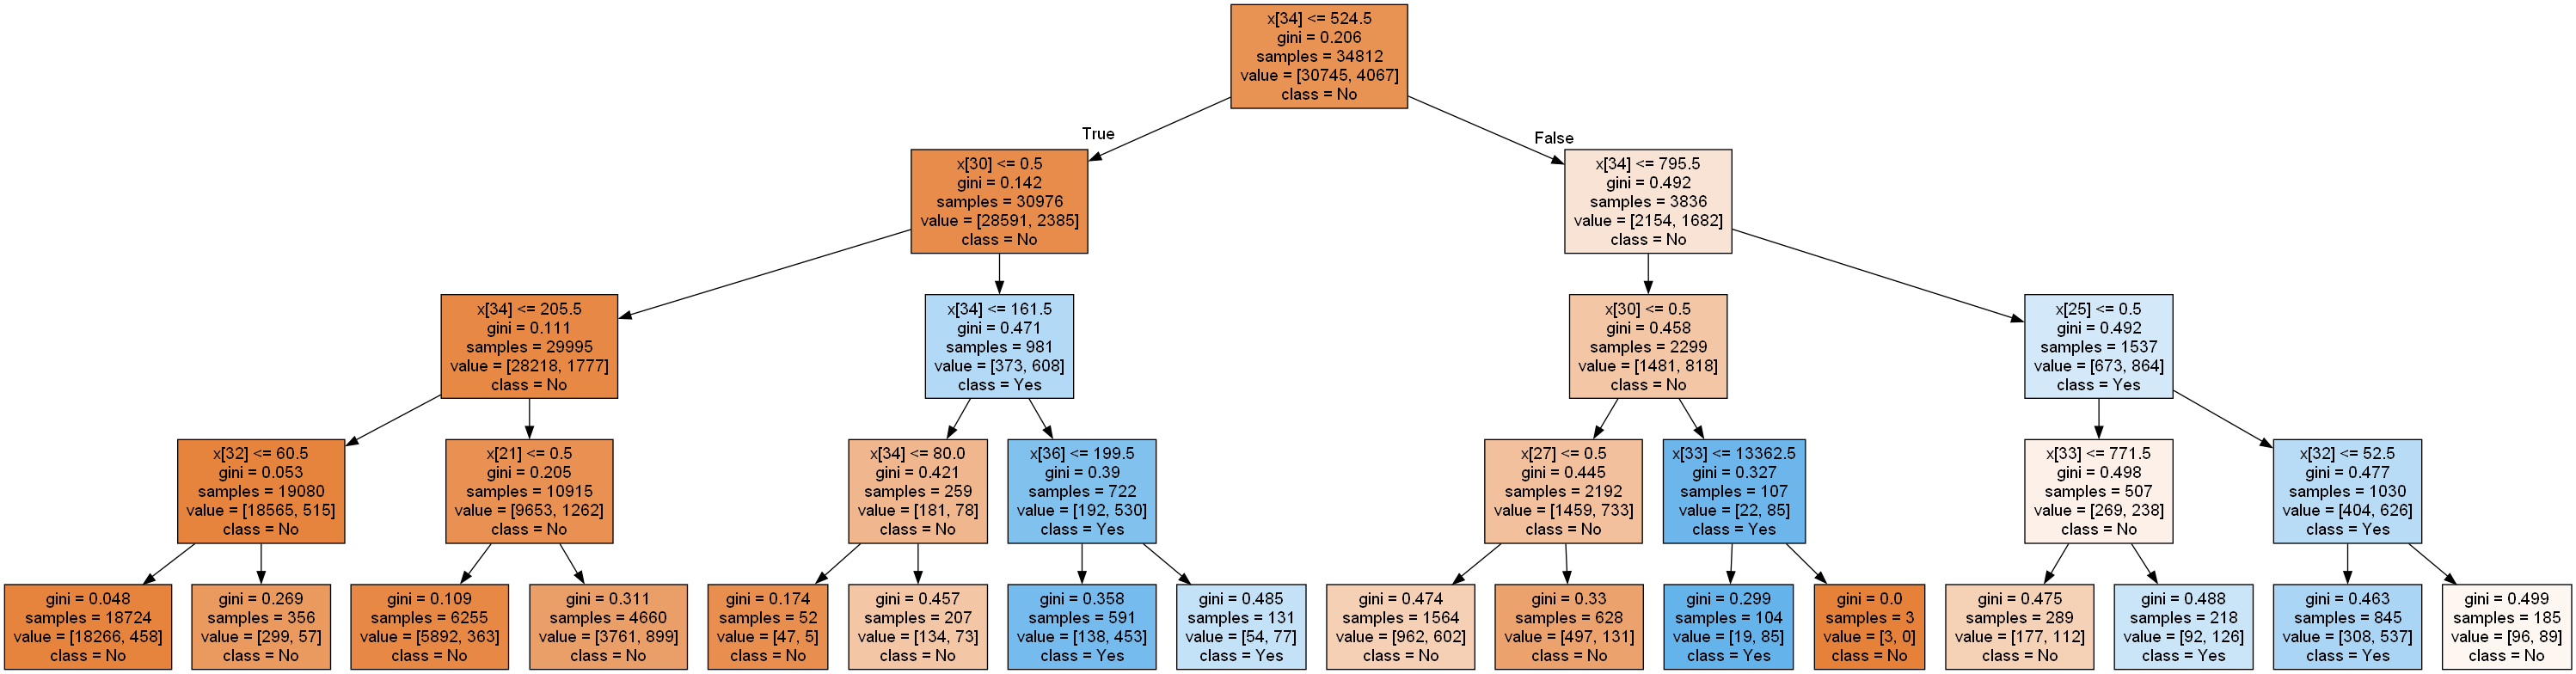

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# omezení výšky stromu na 4 patra 
clf = DecisionTreeClassifier(max_depth= 4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ValueError: Length of feature_names, 32 does not match number of features, 38
# feature_names=encoder.get_feature_names_out()
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, class_names=["No", "Yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Matice záměn:

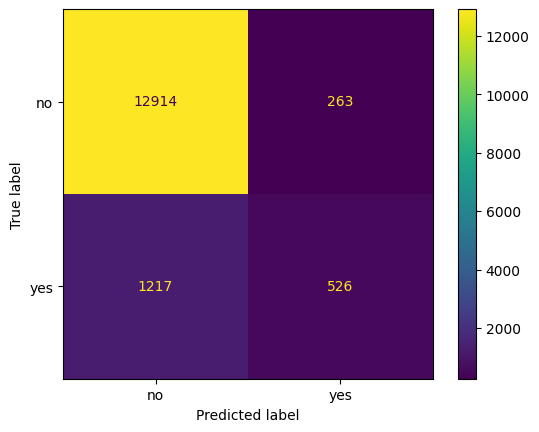

In [33]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

Metriky:

In [34]:
accuracy_score(y_test, y_pred)

0.900804289544236

In [58]:
precision_score(y_test, y_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['no', 'yes']

In [36]:
recall_score(y_test, y_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['no', 'yes']